### **What is Customer Churn?**  
Customer churn refers to the situation where customers or subscribers stop doing business with a particular firm or service.  
In the highly competitive telecommunications industry, customers have many choices and often switch between providers, leading to an annual churn rate of 15-25 percent.  
Due to the large number of customers, it's difficult for companies to focus on individual customer retention, as the costs would outweigh the additional revenue. However, by predicting which customers are at risk of leaving, the company can focus on retaining these "high risk" customers to increase loyalty and revenue. Reducing customer churn is crucial as it's less expensive to retain existing customers than to acquire new ones.  
To lower customer churn, telecom companies must predict which customers are at risk and have a comprehensive understanding of their interactions through various channels. By reducing customer churn, the company can not only maintain its market position but also grow and succeed, as having more customers in their network results in lower costs and higher profits. The company's focus should be on reducing customer attrition and implementing effective retention strategies.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### The Dataset  
The data set used in this article is available in the Kaggle and contains nineteen columns (independent variables) that indicate the characteristics of the clients of a fictional telecommunications corporation. The `Churn` column (response variable) indicates whether the customer departed within the last month or not. The class `No` includes the clients that did not leave the company last month, while the class `Yes` contains the clients that decided to terminate their relations with the company. The objective of the analysis is to obtain the relation between the customer’s characteristics and the churn.

#### Read dataset

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
len(df)

7043

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset contains 7043 observations and 21 columns

- CustomerID: the ID of the customer  
- Gender: male/female  
- SeniorCitizen: whether the customer is a senior citizen (0/1)  
- Partner: whether they live with a partner (yes/no)  
- Dependents: whether they have dependents (yes/no)  
- Tenure: number of months since the start of the contract  
- PhoneService: whether they have phone service (yes/no)  
- MultipleLines: whether they have multiple phone lines (yes/no/no phone service)  
- InternetService: the type of internet service (no/fiber/optic)  
- OnlineSecurity: if online security is enabled (yes/no/no internet)  
- OnlineBackup: if online backup service is enabled (yes/no/no internet)  
- DeviceProtection: if the device protection service is enabled (yes/no/no internet)  
- TechSupport: if the customer has tech support (yes/no/no internet)  
- StreamingTV: if the TV streaming service is enabled (yes/no/no internet)  
- StreamingMovies: if the movie streaming service is enabled (yes/no/no internet)  
- Contract: the type of contract (monthly/yearly/two years)  
- PaperlessBilling: if the billing is paperless (yes/no)  
- PaymentMethod: payment method (electronic check, mailed check, bank transfer, credit card)  
- MonthlyCharges: the amount charged monthly (numeric)  
- TotalCharges: the total amount charged (numeric)  
- Churn: if the client has canceled the contract (yes/no)

Pandas automatically inferred types for all the columns of the dataframe. TotalCharges is incorrectyly identified as **object** but it should be **float**

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The column `TotalCharges` has 11 missing values.
We are going to remove them from dataset.

In [9]:
df.dropna(inplace=True)

`customerID` column is useless to explain whether not the customer will churn, for this reason we drop this column from the dataset.

In [10]:
df.drop(columns="customerID", inplace=True)

Changing `Churn`values from **string** to **int**

In [11]:
df["Churn"] = (df["Churn"] == 'Yes').astype(int)

In [12]:
df["Churn"].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

#### Mutual information

We can measure the degree of dependency between a categorical variable and the target variable.
Higher values of mutual information mean a higher degree of dependence: if the
mutual information between a categorical variable and the target is high, this categorical variable will be quite useful for predicting the target. On the other hand, if the mutual information is low, the categorical variable and the target are independent,
and thus the variable will not be useful for predicting the target.

In [13]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df["Churn"])

# categorical_variables = df.select_dtypes(include=object).drop("Churn", axis=1)
categorical_variables = df.select_dtypes(include=object)

feature_importance = categorical_variables.apply(calculate_mi).sort_values(ascending=False)

feature_importance

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64

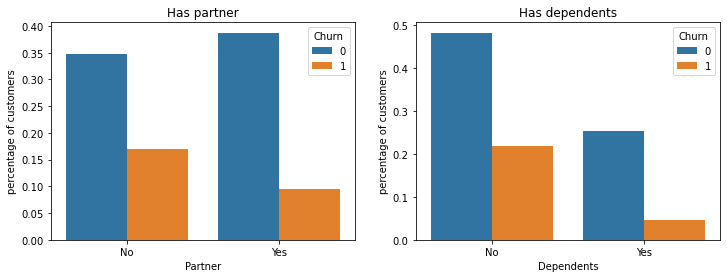

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

In [15]:
print(f'A customer with a partner has a probability of {round(df[df["Partner"]=="Yes"]["Churn"].mean()*100,2)} % churn')
print(" ")
print(f'A customer without any partner has a probability of {round(df[df["Partner"]=="No"]["Churn"].mean()*100,2)} % churn')

A customer with a partner has a probability of 19.72 % churn
 
A customer without any partner has a probability of 32.98 % churn


In [16]:
print (f'A customer with dependents has a probability of {round(df[df["Dependents"]=="Yes"]["Churn"].mean()*100,2)} % churn')
print("  ")
print (f'A customer without any dependents has a probability of {round(df[df["Dependents"]=="No"]["Churn"].mean()*100,2)} % churn')

A customer with dependents has a probability of 15.53 % churn
  
A customer without any dependents has a probability of 31.28 % churn


- Customers that doesn't have partners are more likely to churn
- Customers without dependents are also more likely to churn

In [17]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()]
    )

<ipython-input-17-b5dd464f67de>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()]


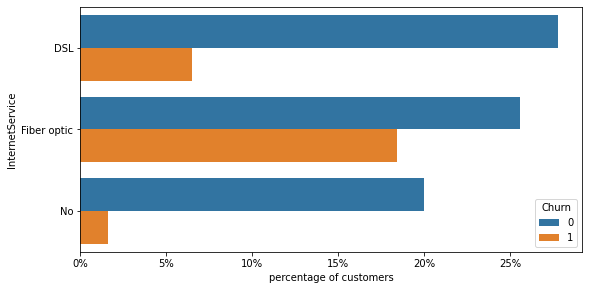

In [18]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

In [19]:
print (f'A customer with a Fiber Optic internet service has a probability of {round(df[df["InternetService"]=="Fiber optic"]["Churn"].mean()*100,2)} % churn')

print(" ")

print (f'A customer with a DSL internet service has a probability of {round(df[df["InternetService"]=="DSL"]["Churn"].mean()*100,2)} % churn')

print(" ")

print (f'A customer without any internet service has a probability of {round(df[df["InternetService"]=="No"]["Churn"].mean()*100,2)} % churn')

A customer with a Fiber Optic internet service has a probability of 41.89 % churn
 
A customer with a DSL internet service has a probability of 19.0 % churn
 
A customer without any internet service has a probability of 7.43 % churn


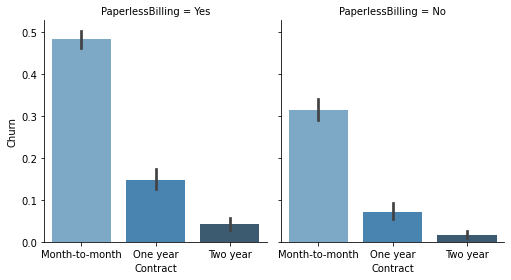

In [20]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "Churn", palette="Blues_d",
          order=["Month-to-month", "One year", "Two year"])

<ipython-input-17-b5dd464f67de>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()]


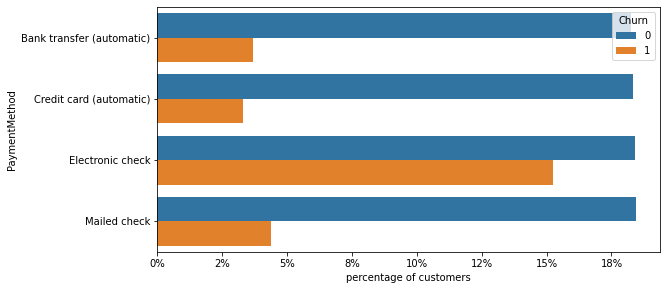

In [21]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient="h")

In [22]:
print (f'A customer with a Payment method as a Electornic Check has a probability of {round(df[df["PaymentMethod"]=="Electronic check"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer with a Payment method as a Mailed Check has a probability of {round(df[df["PaymentMethod"]=="Mailed check"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer with a Payment method as a Bank transfer (automatic) has a probability of {round(df[df["PaymentMethod"]=="Bank transfer (automatic)"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer with a Payment method as a Credit card (automatic) has a probability of {round(df[df["PaymentMethod"]=="Credit card (automatic)"]["Churn"].mean()*100,2)} % churn')

A customer with a Payment method as a Electornic Check has a probability of 45.29 % churn

A customer with a Payment method as a Mailed Check has a probability of 19.2 % churn

A customer with a Payment method as a Bank transfer (automatic) has a probability of 16.73 % churn

A customer with a Payment method as a Credit card (automatic) has a probability of 15.25 % churn


- Customers with paperless billing are more probable to churn
- The preferred payment method is Electronic check with around 35% of customers.
- Short term contracts have higher churn rates.

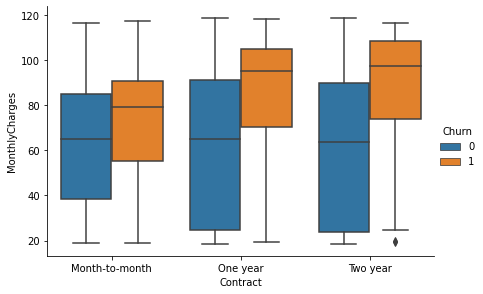

In [23]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4, aspect=1.5)

- Longer contracts are more affected by higher monthly charges for churn rate.

### Feature Engineering

In [33]:
print(np.unique(df[['OnlineSecurity','OnlineBackup','DeviceProtection',
     'TechSupport','StreamingTV','StreamingMovies']].values))

['No' 'No internet service' 'Yes']


- We see that `No internet service` is repeating several times in the features and in this problem at hand it gives same meaning as **No**  
- Therefore we can change them to **No** and then features will have two unique values.

In [34]:
df[['OnlineSecurity','OnlineBackup','DeviceProtection',
     'TechSupport','StreamingTV','StreamingMovies']]= df[['OnlineSecurity','OnlineBackup','DeviceProtection',
                                                           'TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

#### Label Encoder

This approach involves converting each value in a column to a number. This encoding replaces every category with a numerical label.

In [35]:
df_transformed = df.copy()

In [37]:
label_encoding_colums = ["gender", "Partner", "Dependents", "PaperlessBilling",
                        "PhoneService", "OnlineSecurity","OnlineBackup","DeviceProtection", 
                         "TechSupport","StreamingTV","StreamingMovies"]

for column in label_encoding_colums:
    if column == "gender":
        df_transformed[column] = df_transformed[column].map({"Female": 1, "Male": 0})
    else:
        df_transformed[column] = df_transformed[column].map({"Yes": 1, "No": 0})

#### One-Hot Encoder

Each category value is converted into a new column an assigned a 1 or 0 value to the column. The new column contains zeros and ones indicating the absence or presence of the category in the data.

In [42]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [44]:
one_hot_encoding_columns = ["MultipleLines", "InternetService",
                            "Contract", "PaymentMethod"]

df_transformed = pd.get_dummies(df_transformed, columns=one_hot_encoding_columns)

####  Normalization

The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stabillity of the model. We are using **Min-Max Scaling**

In [45]:
min_max_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

In [46]:
for column in min_max_columns:
    min_column = df_transformed[column].min()
    max_column = df_transformed[column].max()
    df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)

### Training and Testing Data

In [48]:
X = df_transformed.drop(columns="Churn")
y = df_transformed.loc[:, "Churn"]

print(X.columns)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Churn


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=42, shuffle=True)

### Training Algorithms

For this model we are going to use these algorithms:
- K Nearest Neighbors
- Logistic Regression
- Support Vector Machines
- Random Forest
- XGBoost

In [87]:
def create_models(seed=42):
    
    # Create a list of machine learning models.
    
    models = {}
    models["k_nearest_neighbors"] = KNeighborsClassifier()
    models["logistic_regression"] = LogisticRegression(random_state=seed)
    models["support_vector_machines"] = SVC(random_state=seed)
    models["random_forest"] = RandomForestClassifier(random_state=seed)
    models["gradient_boosting"] = GradientBoostingClassifier(random_state=seed)
    models["xgboost"] = XGBClassifier(random_state=seed)
    
    return models

models = create_models()

In [90]:
for name, model in models.items():
    # Fit the model with the training data
    model.fit(X_train, y_train)
    # Make predictions with the testting 
    predictions = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    # Append the model name and the accuracy to the lists
    
    print(f"Classifier: {name}, Accuracy: {accuracy:.4f}")

Classifier: k_nearest_neighbors, Accuracy: 0.7536
Classifier: logistic_regression, Accuracy: 0.7957
Classifier: support_vector_machines, Accuracy: 0.7929
Classifier: random_forest, Accuracy: 0.7820
Classifier: gradient_boosting, Accuracy: 0.7976
Classifier: xgboost, Accuracy: 0.7810


We chose **Gradient Boosting** as a best fitting algorithm for this problem.

In [93]:
best_model = models["gradient_boosting"]

#### Confusion Matrix

C:\Users\ali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


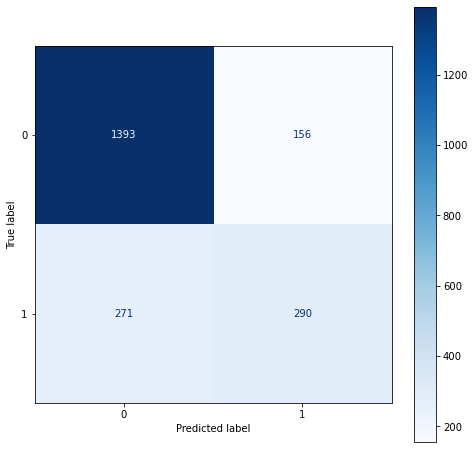

In [95]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

In [99]:
best_model_prediction = best_model.predict(X_test)

In [100]:
print(classification_report(y_test, best_model_prediction))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [101]:
accuracy_score(y_test, best_model_prediction)

0.7976303317535545

Now we can use this model for scoring real customers and think about our marketing campaign for preventing churn.